##<font color='Blue'> **Base de Dados Drogas** </font>

#### <font color='GRAY'> **1° Entender o Problema de Negócio**  </font>

Fazer Previsão do resultado dos medicamentos que podem ser aplicadas de forma precisa nos pacientes.

Dados obtidos do Kaggle: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees?select=drug200.csv


##### **Instalando biblioteca de versão**

In [68]:
# Instalando o pacote para gerar as versões dos pacotes usados
!pip install -q -U watermark

##### *Importando as bibliotecas*

In [69]:
# Bibliotecas
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ignorando alertas
import warnings
warnings.filterwarnings("ignore")

# Manter os gráficos nessa pagina
%matplotlib inline

###### **Visualizando as versões dos pacotes**

In [70]:
%reload_ext watermark
%watermark -a "WMS" --iversions

Author: WMS

IPython   : 5.5.0
pandas    : 1.3.5
seaborn   : 0.11.2
matplotlib: 3.2.2
numpy     : 1.21.5



##### *Carregar ou conectar a base de dados*





In [71]:
# Carregando a base de dados DataFrame
df = pd.read_csv('/content/drug200.csv')

In [72]:
# Visualizando as 5 primeiras lindas da base de dados
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [73]:
# Visualizando as 5 últimas linhas do DataFrame
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX



### <font color='GRAY'> **2° Análise Exploratória dos Dados**   </font>

#### Descrição das Varáveis  → *Entendendo os nosso Dados*

- **Age** → é a idade da pessoa

- **Sex** → é o sexo da Pessoa (*Masculino = M   e     Feminino = F*)

- **BP** → é o níveil de pressão arterial (*Alto, Baixo, e Normal*)

- **Cholesterol** → é o níveil de Colesterol (*Alto e Normal*)

- **Na_to_k**  → é a razão entre a quantidade de Sódio (**Na**) para Potássio (**K**) encontrada no sangue. 

- **Drug** → é o tipo de medicamento ou droga a ser aplicada (que é o nosso *Target* ou seja, *é variável a ser predita*)

In [74]:
# Verificar o tamanho da base de dados shape conjunto (linhas, colunas)

df.shape

(200, 6)

In [75]:
# Verificando o tipo de dados
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [76]:
# Verificando o tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [77]:
# Verificando a quantidade de itens
df.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [78]:
# Verificando valores ausentes

df.isnull().sum().sum()

0

In [79]:
# Verificando valores ausentes

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [80]:
# Verificando se ha valores duplicados

df.duplicated().sum()

0

In [81]:
# Verificando valores em cada coluna

df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [82]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [83]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [84]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [85]:
# Analise Matematica - ESTATISTICA DESCRITIVA

df.describe().round(2)

,Age,Na_to_K
count,200.00,200.00
mean,44.32,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


In [86]:
# Verificando somente idade
df['Age'].describe().round(2)

count    200.00
mean      44.32
std       16.54
min       15.00
25%       31.00
50%       45.00
75%       58.00
max       74.00
Name: Age, dtype: float64

In [87]:
# Varificando a distribuição dos dados categoricos

df.select_dtypes(include= "object").describe()

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


## Associação de variaveis

In [88]:
# Média de idade por Sexo
df.groupby('Sex')['Age'].mean().round(2)

Sex
F    42.56
M    45.93
Name: Age, dtype: float64

In [89]:
# Média de idade por BP
df.groupby('BP')['Age'].mean().round(2)

BP
HIGH      42.23
LOW       47.03
NORMAL    44.08
Name: Age, dtype: float64

In [90]:
# Média de idade por Colesterol
df.groupby('Cholesterol')['Age'].mean().round(2)

Cholesterol
HIGH      45.41
NORMAL    43.15
Name: Age, dtype: float64

In [91]:
# Média de idade por drogas 
df.groupby('Drug')['Age'].mean().round(2)

Drug
DrugY    43.75
drugA    35.87
drugB    62.50
drugC    42.50
drugX    44.02
Name: Age, dtype: float64

### **Analisando a distribuição de cada variavel** 

##### Analisando a variavel **BP**

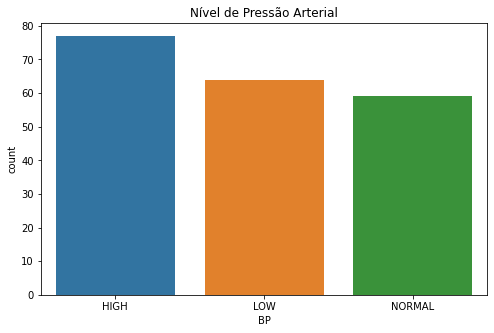

In [92]:
plt.figure(figsize=(8,5))
sns.countplot(df.BP)
plt.title('Nível de Pressão Arterial')
plt.show()

In [93]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [94]:
# Transformando em porcentagem

(df.BP.value_counts())*100/200

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

##### **Conclusão**:

- Apenas cerca de **30%** dos meus pacientes apresentam pressão arterial normal.

##### Analisando a variavel **DRUG**

In [95]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [96]:
((df.Drug.value_counts())/200)*100

DrugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: Drug, dtype: float64

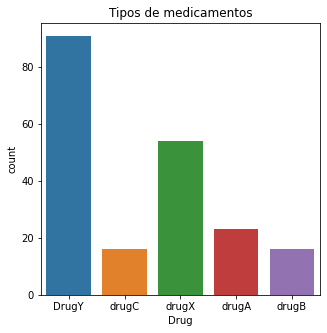

In [97]:
plt.figure(figsize=(5,5))
sns.countplot(df.Drug)
plt.title('Tipos de medicamentos')
plt.show()

##### **Conclusão**:
- O medicamento do tipo **Y** é o mais consumido.

### Associando as variaveis Idade, Sexo e Drug

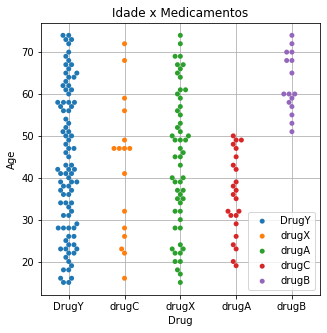

In [98]:
# Gráfico
plt.figure(figsize=(5,5))
sns.swarmplot(x='Drug', y='Age', data=df)
plt.legend(df.Drug.value_counts().index)
plt.title('Idade x Medicamentos')
plt.grid()
plt.show()

##### **Conclusões**:
- O medicamento do tipo **B** é usado apenas por pacientes com idade > 50 anos

- O medicamento do tipo **A** é usado apenas por pacientes com idade < 50 anos

### Analisando o consumo de medicamentos por sexo.

In [99]:
df_sex_drug = df.groupby(['Drug', 'Sex']).size().reset_index(name='Count')
df_sex_drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


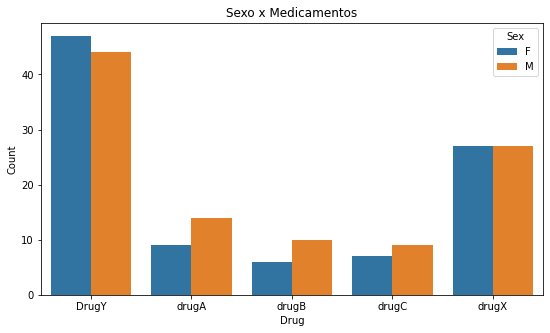

In [100]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="Sex", data=df_sex_drug)
plt.title('Sexo x Medicamentos')
plt.show()

#### **Conclisão:**
- O medicamento do tipo **Y** é o mais usado por mulheres. 

- Enquanto que os outros medicamentos são mais usados po homens.

### Analisando o tipo de drogas em função do nivel de Pressão Arterial.

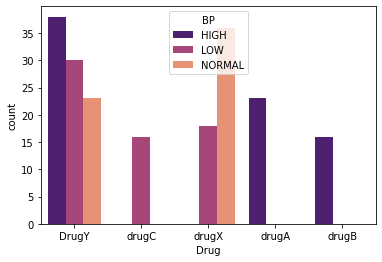

In [101]:
# Gráfico
sns.countplot(x='Drug', hue='BP', data=df, palette='magma')

#### **Conclusões:**
- O medicamento do tipo *Y*, é usado principalmente por pessoas com ALTO **BP**

- O medicamento do tipo *C*, é usado apenas por pessoas com BAIXO **BP**

- O medicamento do tipo *X*, não é usado por pessoas com ALTO **BP**

- Os medicamento do tipo *A* e *B*, são usados apenas por pessoas com ALTO **BP**

### Analisando o tipo de medicamentos por nivel de Colesterol.

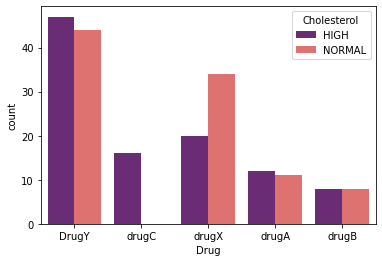

In [102]:
# Gráfico
sns.countplot(x='Drug', hue='Cholesterol', data=df, palette='magma')

#### **Conclusão:**
- O medicamento do tipo *C* é usado apenas por pessoas que apresentam um nivel ALTO de Colesterol

### Analisando o tipo de medicamentos por proporção de Sódio(Na) e Potássio(K)

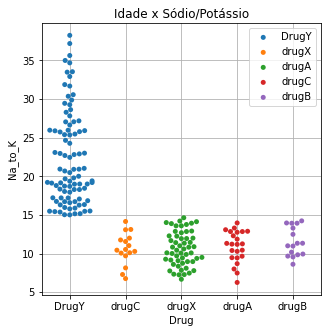

In [103]:
# Gráfico
plt.figure(figsize=(5,5))
sns.swarmplot(x='Drug', y='Na_to_K', data=df)
plt.legend(df.Drug.value_counts().index)
plt.title('Idade x Sódio/Potássio')
plt.grid()
plt.show()

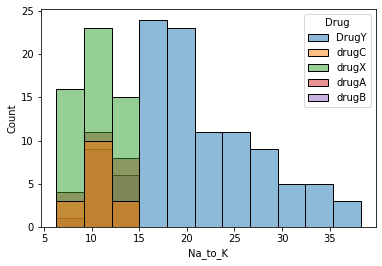

In [104]:
sns.histplot(x='Na_to_K', hue='Drug', data=df)
plt.show()

##### **Conclusão**: 

- O medicamento do tipo *Y* é usado apenas por pacientes com razão **Na** (Sódio) para **K** (Potássio) maior que 15

#### Verificando **Outliers**

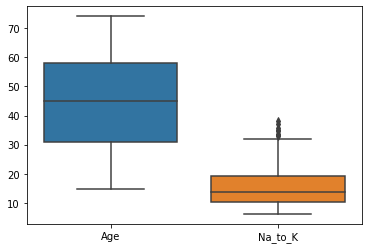

In [105]:
sns.boxplot(data = df)
plt.show()

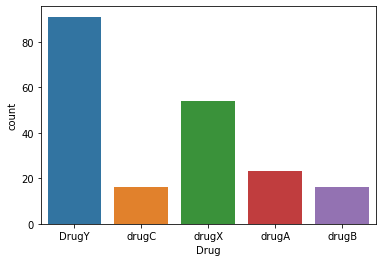

In [106]:
# Verificando a variável Drug

sns.countplot(df['Drug'])

In [107]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

#3° Pré-Processamento dos Dados

In [108]:
# Instalando a Category_Encoders
!pip install Category_Encoders

In [109]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [110]:
df.select_dtypes(include= "object").describe()

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


#### <font color = 'Tomato'> **Ordinal Encoder**</font>

In [111]:
from category_encoders.ordinal import OrdinalEncoder

In [112]:
# Criando o codificador
ordinal_enc = OrdinalEncoder()

In [113]:
# Transformando a coluna
df_transf = ordinal_enc.fit_transform(df)
df_transf.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,1
1,47,2,2,1,13.093,2
2,47,2,2,1,10.114,2
3,28,1,3,1,7.798,3
4,61,1,2,1,18.043,1


In [114]:
# Separando as variáveis explicativas e o Target (Profit)
X = df_transf.iloc[:, :-1].values 
y = df_transf.iloc[:, -1].values   

In [115]:
X

array([[23.   ,  1.   ,  1.   ,  1.   , 25.355],
       [47.   ,  2.   ,  2.   ,  1.   , 13.093],
       [47.   ,  2.   ,  2.   ,  1.   , 10.114],
       [28.   ,  1.   ,  3.   ,  1.   ,  7.798],
       [61.   ,  1.   ,  2.   ,  1.   , 18.043],
       [22.   ,  1.   ,  3.   ,  1.   ,  8.607],
       [49.   ,  1.   ,  3.   ,  1.   , 16.275],
       [41.   ,  2.   ,  2.   ,  1.   , 11.037],
       [60.   ,  2.   ,  3.   ,  1.   , 15.171],
       [43.   ,  2.   ,  2.   ,  2.   , 19.368],
       [47.   ,  1.   ,  2.   ,  1.   , 11.767],
       [34.   ,  1.   ,  1.   ,  2.   , 19.199],
       [43.   ,  2.   ,  2.   ,  1.   , 15.376],
       [74.   ,  1.   ,  2.   ,  1.   , 20.942],
       [50.   ,  1.   ,  3.   ,  1.   , 12.703],
       [16.   ,  1.   ,  1.   ,  2.   , 15.516],
       [69.   ,  2.   ,  2.   ,  2.   , 11.455],
       [43.   ,  2.   ,  1.   ,  1.   , 13.972],
       [23.   ,  2.   ,  2.   ,  1.   ,  7.298],
       [32.   ,  1.   ,  1.   ,  2.   , 25.974],
       [57.   ,  2. 

In [116]:
y

array([1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 4, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 3, 5, 3, 1, 3, 3, 4, 3, 3, 3, 1, 5, 1, 3,
       3, 3, 4, 2, 1, 1, 1, 3, 1, 1, 5, 2, 5, 1, 3, 1, 1, 4, 1, 3, 5, 1,
       4, 3, 1, 1, 5, 1, 3, 1, 1, 1, 4, 1, 4, 3, 5, 3, 2, 4, 2, 5, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 4, 2, 3, 1, 3, 3, 1, 5, 1,
       4, 3, 3, 3, 3, 1, 3, 3, 4, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 1, 3, 5, 4, 5, 3, 4, 1, 5, 1, 4, 3, 3, 4, 3, 2, 4, 5, 3, 3,
       1, 2, 4, 1, 2, 3, 3, 5, 3, 1, 1, 1, 1, 3, 1, 4, 3, 3, 1, 1, 4, 1,
       4, 1, 1, 1, 1, 3, 3, 1, 1, 1, 5, 4, 1, 1, 1, 4, 1, 2, 1, 2, 2, 3,
       3, 3])

### **Separando os dados de treino e teste**

In [117]:
# Fazendo a Amostragem dos Dados em Traino e Teste
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

# 4° Construção da Máquina Preditiva

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(x_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


# 5° Avaliando a Máquina

In [120]:
# Score do modelo nos dados de teste
result = modelo.score(x_test, y_test)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 88.333%


## Outras métricas

In [121]:
# Aplicando modelo aos dados de validação
y_predict = modelo.predict(x_test)

In [122]:
# Criando
matriz_confusao = confusion_matrix(y_test, y_predict)

In [123]:
# Evaluate model
print('Confusion Matrix: \n', matriz_confusao)

Confusion Matrix: 
 [[28  1  0  0  1]
 [ 1  1  2  0  0]
 [ 1  0 17  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  1  2]]


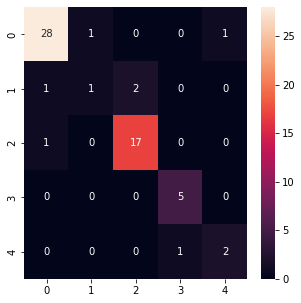

In [124]:
# Visualizando em um Mapa de Calor do Seabor
plt.figure(figsize=(5,5))
sns.heatmap(matriz_confusao, annot=True)

#### **Verificando outras métricas de avaliação**

In [125]:
# Avaliar modelo
print('Classification metrics: \n', classification_report(y_test, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        30
           2       0.50      0.25      0.33         4
           3       0.89      0.94      0.92        18
           4       0.83      1.00      0.91         5
           5       0.67      0.67      0.67         3

    accuracy                           0.88        60
   macro avg       0.77      0.76      0.75        60
weighted avg       0.87      0.88      0.87        60



#### **Fazendo novas Previsões**

In [126]:
# Comparar valores reais e previstos
real_vs_predict = pd.DataFrame({'Valor Real ': y_test,
                     'Valor Predito ': y_predict})
real_vs_predict.head(10)

,Valor Real,Valor Predito
0,2,3
1,3,3
2,1,1
3,1,1
4,1,1
5,3,3
6,3,3
7,3,3
8,1,1
9,3,3
